In [1]:
import pandas as pd
import numpy as np
import os,sys

import seaborn as sns
import matplotlib.pyplot as plt
from aux import fitCPH_and_plotKM_treatments

%matplotlib inline

In [2]:
import lifelines
lifelines.__version__

'0.27.0'

# UKE

In [3]:
annot = pd.read_csv("data/UKE.sample_annotation_v4_181samples.tsv",sep ="\t",index_col=0)
annot.head(2)

,patient_id,tumor_id,bevacizumab,standard,age,FIGO_I-IIIB,FIGO_IIIC,FIGO_IV,OP_0,OP_1,OP_2,OS_time,OS_event,PFS_time,PFS_event
sample_id,,,,,,,,,,,,,,,
T0063,1,63,0,1,53.0,0,1,0,0,1,0,39.0,1.0,8.0,1.0
T0096,2,96,0,1,43.0,0,1,0,1,0,0,61.0,1.0,59.0,1.0


In [4]:
max_time = 100 # limit for plots, does not affect stat. analysis

# to censor data by month 100, uncomment the next line
#annot = pd.read_csv("data/UKE.sample_annotation_v4_181samples.tsv",sep ="\t",index_col=0)

covariates = ["age","FIGO_IIIC","FIGO_IV","OP_1","OP_2", "bevacizumab"]

p-value=0.02
HR=0.61(0.40-0.92)


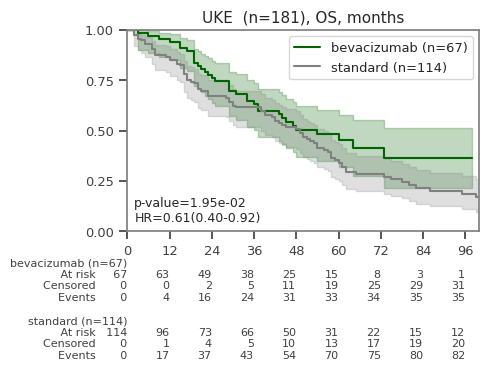

In [5]:
surv = "OS"
surv_event=surv+"_event"
surv_time=surv+"_time"

fitCPH_and_plotKM_treatments(annot,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  figsize=(5,4),
                  add_risk_counts=True,
                  max_time=100,
                  title = "%s  (n=%s), %s, months"%("UKE",annot.shape[0],surv),
                  fig_file = "img/Fig1A.pdf")


p-value=0.10
HR=0.75(0.53-1.06)


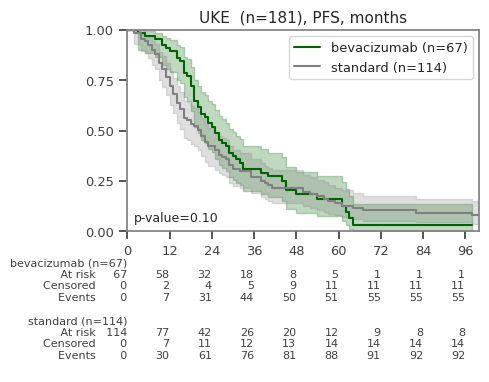

In [6]:
surv = "PFS"
surv_event=surv+"_event"
surv_time=surv+"_time"

fitCPH_and_plotKM_treatments(annot,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  figsize=(5,4),
                  max_time=100,
                  title = "%s  (n=%s), %s, months"%("UKE",annot.shape[0],surv),
                  fig_file = "img/Fig1B.pdf")

# DASL

In [7]:
annot_dasl = pd.read_csv("data/DASL.annotation_Kommoss.tsv.gz",sep ="\t",index_col=0)
print(annot_dasl.shape[0])
annot_dasl.head(2)

377


,bevacizumab,chemo_only,is_HGSOC,FIGO_code,FIGO_IV,FIGO_I-IIIB,FIGO_IIIC,FIGO_1,FIGO_2,FIGO_3,...,PFS_event,PFS_time,treatment,age,is_HGSOC_GEO,OS_event_GEO,OS_time_GEO,PFS_event_GEO,PFS_time_GEO,subtype
sample_id,,,,,,,,,,,,,,,,,,,,,
X5800701055_A,0,1,1,IV,1,0,0,0,0,0,...,0,71.590792,standard,47,0,0,43.594521,0,43.594521,immunoreactive
X5800701055_B,0,1,1,IV,1,0,0,0,0,0,...,1,10.743547,standard,65,1,1,26.169863,1,10.750685,proliferative


p-value=0.02
HR=0.72(0.54-0.96)


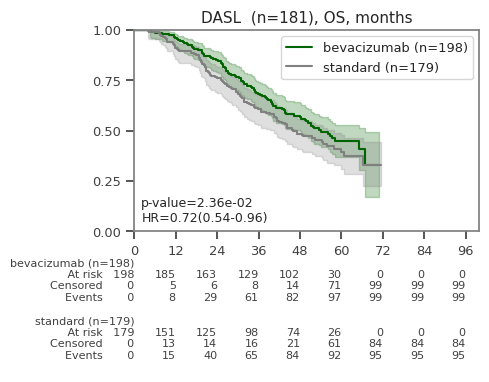

In [8]:
surv = "OS"
surv_event=surv+"_event"
surv_time=surv+"_time"

fitCPH_and_plotKM_treatments(annot_dasl,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  figsize=(5,4),
                  add_risk_counts=True,
                  max_time=100,
                  title = "%s  (n=%s), %s, months"%("DASL",annot.shape[0],surv),
                  fig_file = "img/Fig1C.pdf")


p-value=0.01
HR=0.72(0.56-0.91)


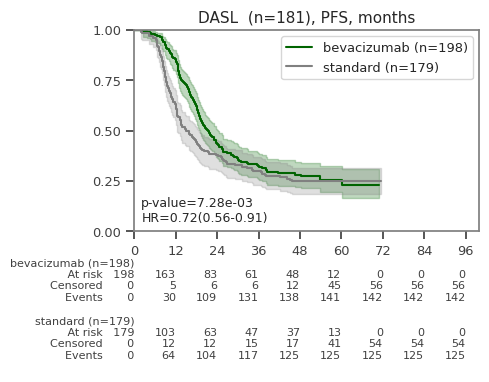

In [9]:
surv = "PFS"
surv_event=surv+"_event"
surv_time=surv+"_time"

fitCPH_and_plotKM_treatments(annot_dasl,
                  surv_event=surv_event,
                  surv_time=surv_time,
                  covariates=covariates,
                  figsize=(5,4),
                  add_risk_counts=True,
                  max_time=100,
                  title = "%s  (n=%s), %s, months"%("DASL",annot.shape[0],surv),
                  fig_file = "img/Fig1D.pdf")
